<a href="https://colab.research.google.com/github/nalinzip/ml_study/blob/main/ML_Week10_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
# 좀 더 편리한 데이터 Handling을 위해 Dataframe 으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

In [4]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)
# 군집화 결과를 irisDF의 'gm_cluster' 칼럼명으로 저장
irisDF ['gmm_cluster'] = gmm_cluster_labels
irisDF['target'] = iris.target
# target 값에 따라 gmm_cluster 값이 어떻게 매핑됐는지 확인.
iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       1              50
1       0              45
        2               5
2       2              50
Name: count, dtype: int64


In [6]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       0                 47
        2                  3
2       2                 36
        0                 14
Name: count, dtype: int64


In [12]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_cluster_plot(kmeans_model, dataframe, label='target', iscenter=False):
    unique_labels = np.unique(dataframe[label].values)
    markers = ['o', '^', 's', 'x', '*']
    colors = ['blue', 'red', 'green', 'orange', 'purple']
    centers = kmeans_model.cluster_centers_ if iscenter else None

    for i, cluster_label in enumerate(unique_labels):
        cluster_data = dataframe[dataframe[label] == cluster_label]
        plt.scatter(cluster_data['ftr1'], cluster_data['ftr2'],
                    marker=markers[i % len(markers)],
                    color=colors[i % len(colors)],
                    edgecolor='k',
                    label=f'Cluster {cluster_label}')

        if iscenter:
            center_x, center_y = centers[i]
            plt.scatter(center_x, center_y, s=200, color='white', edgecolor='k', marker=markers[i])
            plt.scatter(center_x, center_y, s=70, color='black', edgecolor='k', marker=f"${cluster_label}$")

    plt.legend()
    plt.xlabel("ftr1")
    plt.ylabel("ftr2")
    plt.title("Cluster Visualization")
    plt.grid(True)
    plt.show()


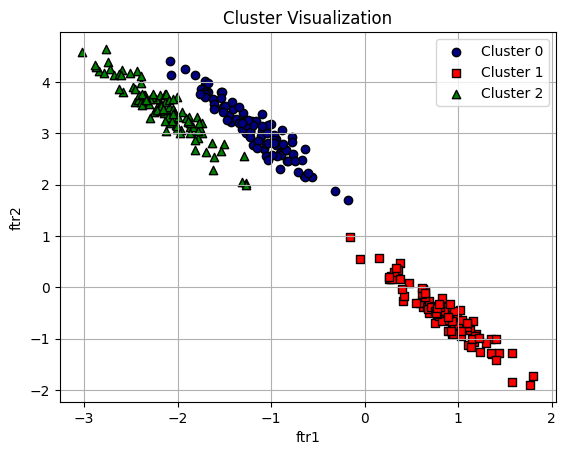

In [13]:
from sklearn.datasets import make_blobs
# make_blobs()로 300 개의 데이터 세트 , 3 개의 군집 세트 , cluster_Std=0.5를 만듦.
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)
# 길게 늘어난 타원형의 데이터 세트를 생성하기 위해 변환함.
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
# feature 데이터 세트와 make_blobs( ) 의 y 결값을 Dataframe 으로 저장
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
# 생성된 데이터 세트를 target 별로 다른 마커로 표시해 시각화함
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)


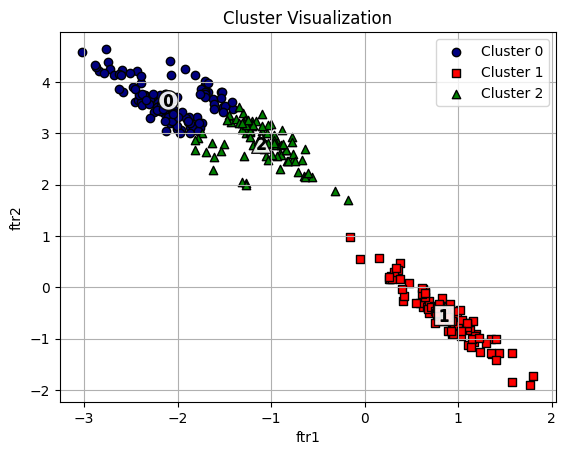

In [14]:
# 3 개의 군집 기반 Kmeans 를 X_aniso 데이터 세트에 적용
kmeans = KMeans (3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label
visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label', iscenter=True)

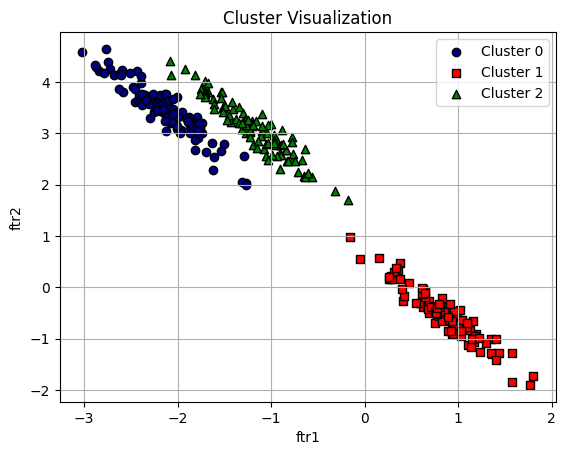

In [15]:
# 3 개의 n_components 기반 GMM 을 X_aniso 데이터 세트에 적용
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF ['gmm_label'] = gmm_label
# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscenter를 False로 설정.
visualize_cluster_plot(gmm, clusterDF, 'gmm_label', iscenter=False)

In [16]:
print('### KMeans Clustering ###')
print(clusterDF.groupby ('target')['kmeans_label'].value_counts())
print('\n### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: count, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: count, dtype: int64
